In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("advertising.csv") 

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.shape

(200, 4)

In [6]:
df.size

800

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Heatmap

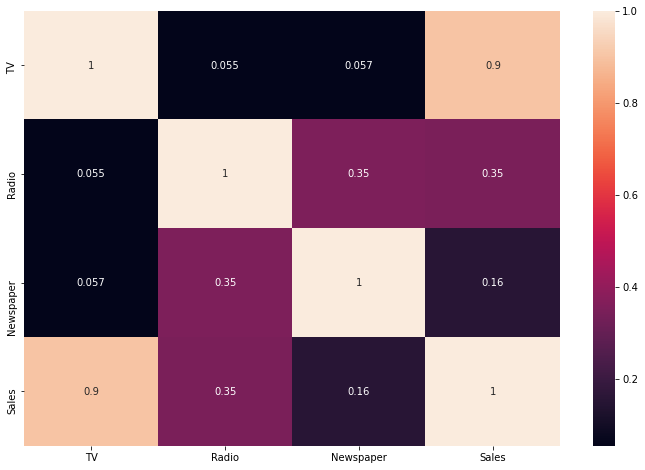

In [12]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(),annot=True); 

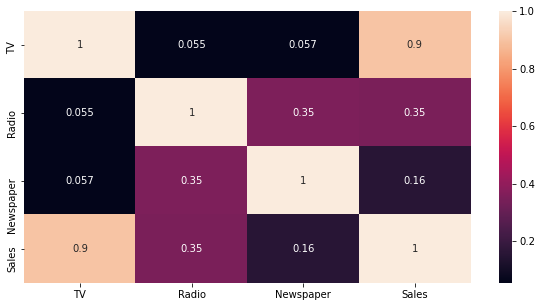

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df[["TV","Radio","Newspaper","Sales"]].corr(),annot=True)
plt.show()

# Pairplot

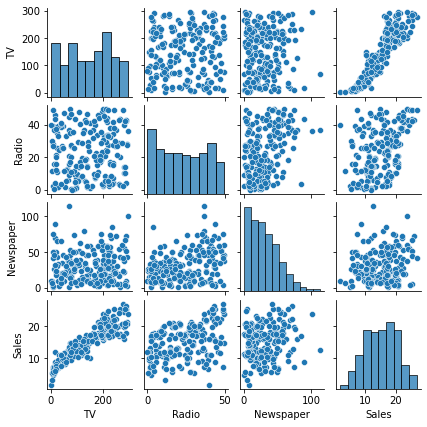

In [14]:
sns.pairplot(df,height=1.5);
plt.show()

# Boxplot

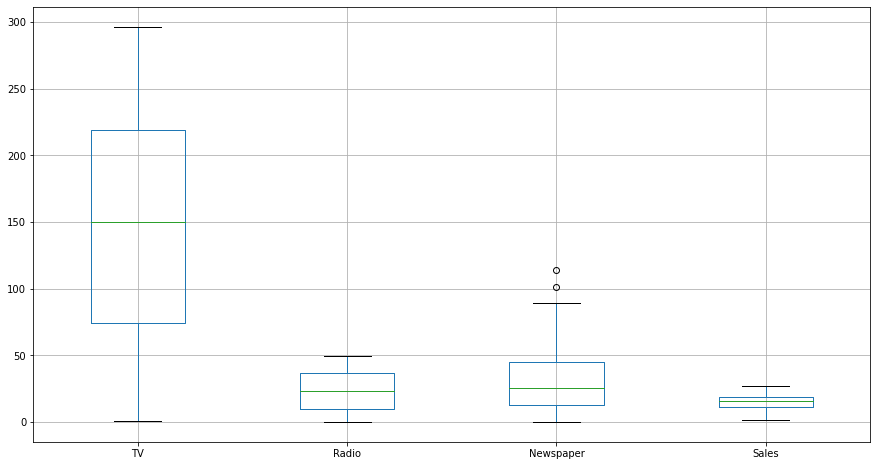

In [15]:
plt.figure(figsize=(15,8)) 
df.boxplot(); 

# OutLiers

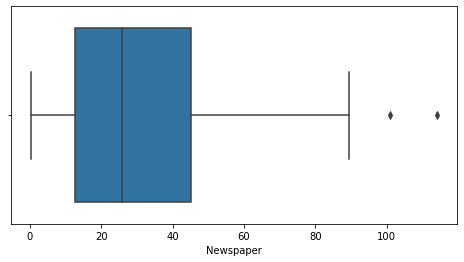

In [16]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Newspaper', data=df, orient='h');

# For_Loop 

In [17]:
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(q=0.25)
    Q3 = df[cols].quantile(q=0.75)
    iqr=Q3-Q1
    
    low = Q1-1.5*(Q3-Q1)
    high = Q3+1.5*(Q3-Q1)
    df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

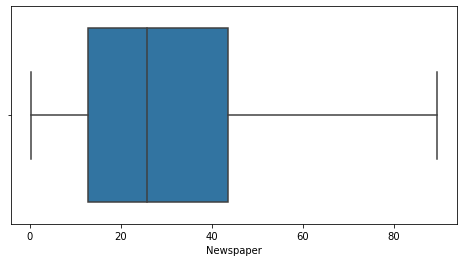

In [18]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Newspaper', data=df, orient='h');

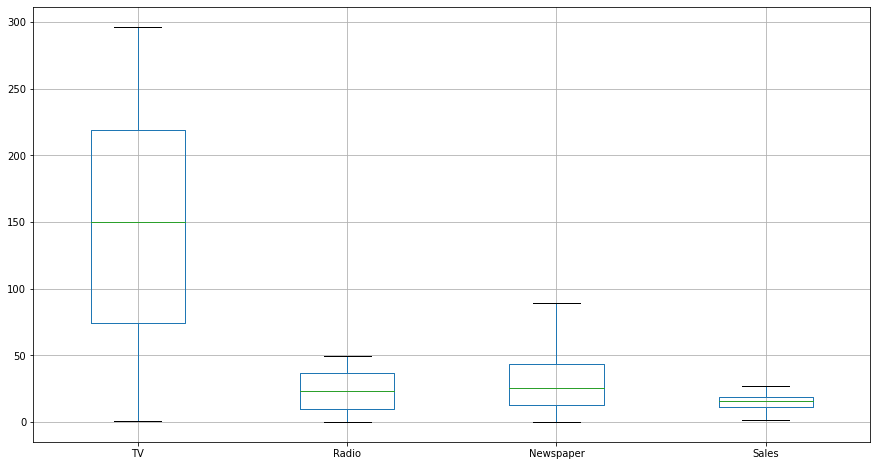

In [19]:
plt.figure(figsize=(15,8))
df.boxplot();

# Standardition

In [20]:
X=df.drop('Sales',axis=1)
y=df['Sales'] 

In [21]:
from sklearn.preprocessing import StandardScaler 
# define StandScaler scaler 
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test) 

In [23]:
reg.score(X_train, y_train) 

0.9003284844736298

In [24]:
reg.score(X_test, y_test) 

0.9048659313302031

# Simple Linear Regression

In [25]:
X=df['TV'].values.reshape(-1,1) 

In [26]:
y=df['Sales'].values.reshape(-1,1) 

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
reg = LinearRegression() 

In [28]:
reg.fit(X_train,y_train) 

LinearRegression()

In [29]:
reg.coef_

array([[0.05548294]])

In [30]:
reg.intercept_ 

array([7.00710843])

In [33]:
reg.score(X_train,y_train) 

0.8134866044709264

In [34]:
reg.score(X_test,y_test)

0.802561303423698

In [31]:
y_train_pred= reg.predict(X_train) 

In [99]:
#y_train_pred

In [32]:
y_test_pred=reg.predict(X_test)

In [100]:
#y_test_pred

* Lniar regression graph

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


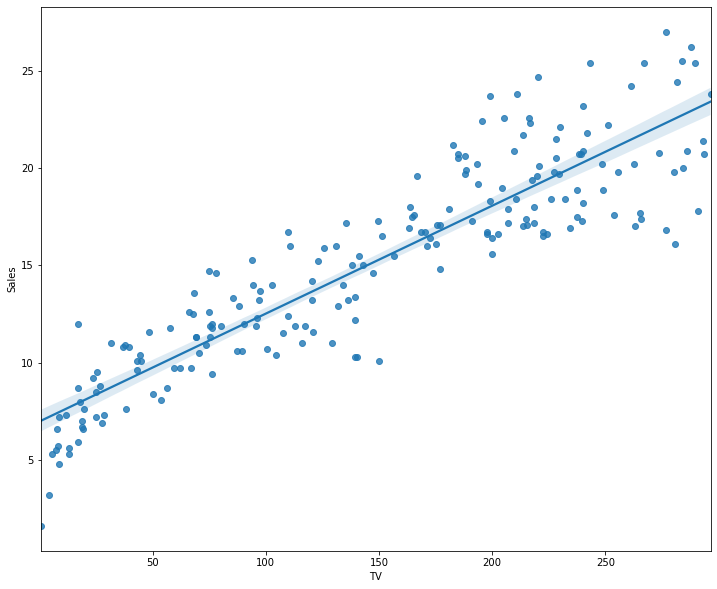

In [35]:
plt.figure(figsize=(12,10))  
sns.regplot(X,y)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show();

# mean_squared_error

In [36]:
from sklearn.metrics import mean_squared_error

In [90]:
mean_squared_error(y_train,y_train_pred)

2.6985484005540523

In [91]:
mean_squared_error(y_test,y_test_pred)

2.847100919337741

# mean_absolute_error

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mean_absolute_error(y_train,y_train_pred)

1.8005092256620792

In [41]:
mean_absolute_error(y_test,y_test_pred)

1.9502948931650088

In [42]:
# 

In [43]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

2.2357196506830133

In [44]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

2.470035001123256

# R2_score

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_train,y_train_pred)

0.8134866044709264

In [47]:
r2_score(y_test,y_test_pred)

0.802561303423698

# R2 And MSE

In [48]:
from sklearn import metrics
print("R score",metrics.r2_score(y_train,y_train_pred))
print("MSE = ", metrics.mean_squared_error(y_train,y_train_pred))

R score 0.8134866044709264
MSE =  4.998442356450174


In [49]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,y_test_pred))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score 0.802561303423698
MSE =  2.939747369372261


# Cross Validation

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold 

0.7616932806978418

# Regularization :  Ridge(L2)

In [52]:
from sklearn import linear_model
ridge_reg= linear_model.Ridge(alpha=500, max_iter=100, tol=0.01)
ridge_reg.fit(X_train, y_train) 

Ridge(alpha=500, max_iter=100, tol=0.01)

In [53]:
ridge_reg.score(X_train, y_train) 

0.8134864462167729

In [54]:
ridge_reg.score(X_test, y_test) 

0.8025613722658813

# Lasso(L1)

In [55]:
from sklearn import linear_model 
lasso_reg = linear_model.Lasso(alpha=500, max_iter=100, tol=0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=500, max_iter=100, tol=0.01)

In [56]:
lasso_reg.score(X_train, y_train)

0.0

In [57]:
lasso_reg.score(X_test, y_test)

-0.032401771801812806

# Elastic Net

In [58]:
from sklearn.linear_model import ElasticNet
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(X_train, y_train)
en_model_pred = en_mod.predict(X_test)

In [59]:
en_mod.score(X_train, y_train) 

0.8134866038839501

In [60]:
en_mod.score(X_test, y_test) 

0.8025613169121678

# Multiple Linear Regression

In [61]:
X=df.drop('Sales',axis=1) 

In [62]:
y=df['Sales'].values.reshape(-1,1) 

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=45)
lr = LinearRegression() 

In [64]:
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
lr.score(X_train,y_train)

0.9073427054008609

In [96]:
lr.score(X_test,y_test)

0.879238046683307

In [97]:
y_train_pred=lr.predict(X_train)

In [98]:
y_test_pred=lr.predict(X_test)

# R2 And MSE

In [69]:
from sklearn import metrics
print("R score",metrics.r2_score(y_train,y_train_pred))
print("MSE = ", metrics.mean_squared_error(y_train,y_train_pred))

R score 0.9073427054008609
MSE =  2.6985484005540523


In [70]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,y_test_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_test_pred))

R score 0.879238046683307
MSE =  2.847100919337741


# Cross Validation

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(lr,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.8863727192708287

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(lr,X_test,y_test, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.8258183987505641

# Regularization (Lasso(L2))

In [73]:
from sklearn import linear_model 
ridge_reg1= linear_model.Ridge(alpha=50, max_iter=100, tol=0.1) 
ridge_reg.fit(X_train, y_train) 

Ridge(alpha=500, max_iter=100, tol=0.01)

In [74]:
ridge_reg.score(X_train, y_train) 

0.9073193771933037

In [75]:
ridge_reg.score(X_test, y_test) 

0.8789781375833019

# Lasso(L1)

In [76]:
from sklearn import linear_model 
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.01)
lasso_reg.fit(X_train, y_train) 

Lasso(alpha=50, max_iter=100, tol=0.01)

In [77]:
lasso_reg.score(X_train, y_train) 

0.8170316789140053

In [78]:
lasso_reg.score(X_test, y_test) 

0.7604225493165624

# Elastic Net

In [79]:
from sklearn.linear_model import ElasticNet
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(X_train, y_train) 

ElasticNet(alpha=0.02)

In [80]:
en_mod.score(X_train, y_train) 

0.9073426648775922

In [81]:
en_mod.score(X_test, y_test) 

0.8792476157078023

# Cross Validation

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print('scores',scores)
accuracy_regfold=np.mean(abs(scores))
print('\nCV mean',accuracy_regfold) 

scores [0.85231233 0.69355811 0.96175208 0.9438426  0.81116063 0.8334238
 0.88855634 0.92576786 0.9561025  0.91656919]

CV mean 0.878304544008629


In [83]:
from sklearn.feature_selection import RFE

In [84]:
folds = KFold(n_splits = 8, shuffle = True, random_state = 45)


In [85]:
hyper_params = [{'n_features_to_select': list(range(1, 8))}]

In [86]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm) 

# GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 8 folds for each of 7 candidates, totalling 56 fits


GridSearchCV(cv=KFold(n_splits=8, random_state=45, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='r2', verbose=1)

In [88]:
model_cv.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [89]:
# final model
n_features_optimal = 1

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
import sklearn.metrics
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2) 

0.879238046683307


# Simple Rege
* Train=0.81
* Test=0.80

# Multiple Regr
* Train=0.90
* Teat=0.87